In [1]:
# importing modules and initialising the interactive mode

from IPython import get_ipython

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('matplotlib', 'notebook')
plt.ion()

<IPython.core.display.Javascript object>


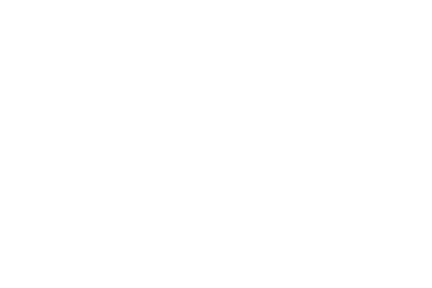

In [2]:
# uploading data and plotting the numerical solution for q1
fname = "Q1.csv"

Data = np.loadtxt(fname, delimiter=';')


X = [[i for i in range(len(Data[0,:]))] for j in range(len(Data[:,0]))]

Y = [[j for i in range(len(Data[0,:]))] for j in range(len(Data[:,0]))]

get_ipython().run_line_magic('matplotlib', 'notebook')
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y , Data)

<IPython.core.display.Javascript object>


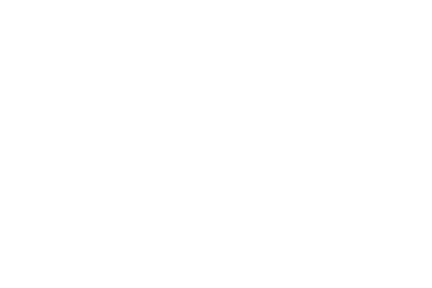

In [3]:
# defining and plotting the analytical solution to q1
def analq1(V,a,b,centre_x,centre_y,x,y):
    """
    V - potential at the further boundary
    a - radius of inner circle
    b - radius of outer circle
    x, y - coordinates
"""
    dist = (centre_x-x)**2+(centre_y-y)**2
    if dist<a**2:
        V_out=0
    elif dist>b**2:
        V_out=V
    else:
        V_out=V*(np.log(np.sqrt(dist)/a)/np.log(b/a))
    return V_out

Analsol = np.zeros((len(Data[:,0]),len(Data[0,:])))
for i in range(len(Data[:,0])):
    for j in range(len(Data[0,:])):    
        Analsol[i][j] = analq1(1.5,25,45,50,50,X[i][j],Y[i][j])

get_ipython().run_line_magic('matplotlib', 'notebook')
fig2 = plt.figure()
ax1 = fig2.add_subplot(111, projection='3d')
ax1.plot_wireframe(X, Y, Data, colors=[(0,1,0,1)])
ax1.plot_wireframe(X, Y , Analsol)
ax1.plot_wireframe(X, Y, Data-Analsol,colors=[(1,0.5,0.5,1)])

<IPython.core.display.Javascript object>


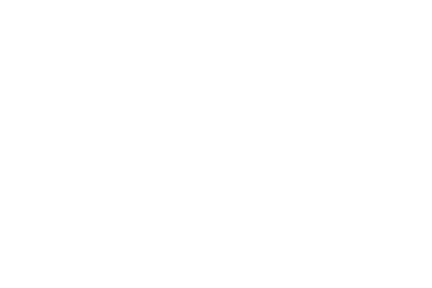

In [4]:
# uploading data and plotting the numerical solution for q2
fname = "Q2.csv"

Data = np.loadtxt(fname, delimiter=';')


X = np.array([[i for i in range(len(Data[0,:]))] for j in range(len(Data[:,0]))])

Y = np.array([[j for i in range(len(Data[0,:]))] for j in range(len(Data[:,0]))])

get_ipython().run_line_magic('matplotlib', 'notebook')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y , Data)

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/lib/python3.4/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


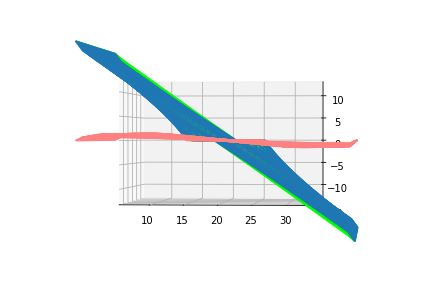

In [8]:
def analq2(V, x_min, x_max, r, centre_x, centre_y, x, y):
    """
    Analytical solution to the 2nd question
    
    V - potential
    x_min - position of first plate
    x_max - position of second plate
    r - radius of circle
    centre_x, centre_y - coordinates of the centre of the circle
    x,y - coordinates of the point to be evaluated
    """
    dist = np.sqrt((centre_x-x)**2+(centre_y-y)**2)
    cosine = (x-centre_x)/dist
    if x<=x_min:
        V_out = 20
    elif x>=x_max:
        V_out = -20
    elif dist<=r:
        V_out = 0
    else:
        V_out = -(2*V/(x_max-x_min))*(dist-(r**3)/dist**2)*cosine
    return V_out

def analq2_1(V, x_min, x_max, r, centre_x, centre_y, x, y):
    """
    Analytical solution to the 2nd question
    
    V - potential
    x_min - position of first plate
    x_max - position of second plate
    r - radius of circle
    centre_x, centre_y - coordinates of the centre of the circle
    x,y - coordinates of the point to be evaluated
    """
    dist = np.sqrt((centre_x-x)**2+(centre_y-y)**2)
    cosine = (x-centre_x)/dist
    if x<=x_min:
        V_out = 20
    elif x>=x_max:
        V_out = -20
    elif dist<=r:
        V_out = 0
    else:
        V_out = -(2*V/(x_max-x_min))*(dist-(r**2)/dist)*cosine
    return V_out

Analsol_1 = np.zeros((len(Data[:,0]),len(Data[0,:])))
for i in range(len(Data[:,0])):
    for j in range(len(Data[0,:])):    
        Analsol_1[i][j] = analq2(20,0,len(Data[:,0])-1,6,20,20,X[i][j],Y[i][j])

Analsol_2 = np.zeros((len(Data[:,0]),len(Data[0,:])))
for i in range(len(Data[:,0])):
    for j in range(len(Data[0,:])):    
        Analsol_2[i][j] = analq2_1(20,0,len(Data[:,0])-1,6,20,20,X[i][j],Y[i][j])
        
get_ipython().run_line_magic('matplotlib', 'notebook')
fig2 = plt.figure()
ax1 = fig2.add_subplot(111, projection='3d')
ax1.plot_wireframe(X, Y, Analsol_1, colors=[(0,1,0,1)])
ax1.plot_wireframe(X, Y , Analsol_2)
ax1.plot_wireframe(X, Y, Analsol_1-Analsol_2,colors=[(1,0.5,0.5,1)])